# CASSIS data preprocessing: identify unique wavegrids

### You can ignore this file entirely.

In [3]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.debugger import set_trace as st

In [4]:
# Some useful functions....

def get_wavelength_grid(path):
    """Return the wavelength grid (as a numpy array) from a pickled pd.DataFrame file."""
    df = pd.read_pickle(path)
    
    print(df.keys())

    wavelength_array = df['wavelength']
    modules = df['module']
    orders = df['order']
    flux = df['flux']
    
    return wavelength_array, flux, modules, orders

In [5]:
wave, flux, modules, orders = get_wavelength_grid('cassis_dataframes/10019072.pkl')

Index(['wavelength', 'flux', 'error (RMS+SYS)', 'error (RMS)', 'error (SYS)',
       'offset uncertainty (CAL)', 'sky', 'sky error', 'module', 'order',
       'nod', 'status', 'flag1', 'flag2', 'flag3', 'unknown'],
      dtype='object')


In [6]:
wave = np.array(wave)
flux = np.array(flux)
modules = np.array(modules)
orders = np.array(orders)

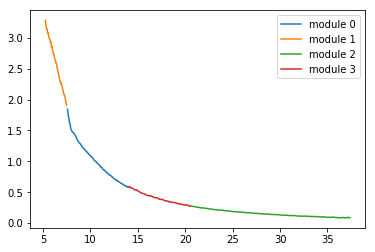

In [7]:
def plotty(wave, flux, modules, idx):
    rx = np.where(modules == idx)[0]
    plt.plot(wave[rx], flux[rx], label='module ' + str(idx))
    return

[plotty(wave, flux, modules, x) for x in (0, 1, 2, 3)]

plt.legend(loc=0);

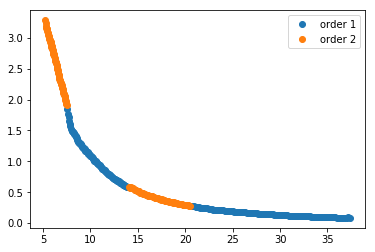

In [8]:
def plotty(wave, flux, orders, idx):
    rx = np.where(orders == idx)[0]
    plt.plot(wave[rx], flux[rx], 'o', label='order ' + str(idx))
    return

[plotty(wave, flux, orders, x) for x in (1, 2)]

plt.legend(loc=0);

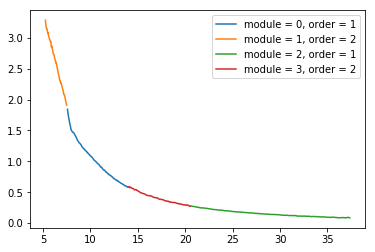

In [9]:
def plotz(module, order):
    rx = np.where((modules == module) & (orders == order))[0]
    
    if len(rx) != 0:
        label = str('module = ' + str(module) + ', order = ' + str(order))
        plt.plot(wave[rx], flux[rx], label=label)
        
    return

[plotz(x, y) for x in (0, 1, 2, 3) for y in (1, 2, 3)]

plt.legend(loc=0);

# SL2: module=1, order=2
# SL3: module=1, order=3
# SL1: module=0, order=1

# LL2: module=3, order=2
# LL3: module=3, order=3
# LL1: module=2, order=1    

In [10]:
def extract_indices(modules, orders):
    
    def sub(module, order):
        rx = np.where((modules == module) & (orders == order))[0]
        return rx
    
    iSL1 = sub(0, 1)
    iSL2 = sub(1, 2)
    iSL3 = sub(1, 3)

    iLL1 = sub(2, 1)
    iLL2 = sub(3, 2)
    iLL3 = sub(3, 3)
    
    return iSL1, iSL2, iSL3, iLL1, iLL2, iLL3

In [11]:
iSL1, iSL2, iSL3, iLL1, iLL2, iLL3 = extract_indices(modules, orders)

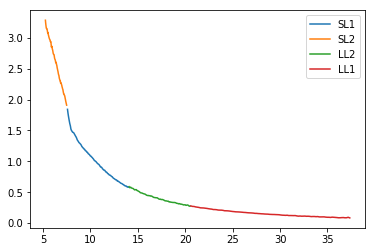

In [13]:
plt.plot(wave[iSL1], flux[iSL1], label='SL1')
plt.plot(wave[iSL2], flux[iSL2], label='SL2')
plt.plot(wave[iLL2], flux[iLL2], label='LL2')
plt.plot(wave[iLL1], flux[iLL1], label='LL1')
plt.legend(loc=0);

In [93]:
wave[iSL2][-1]

7.4854

In [94]:
wave[iSL1][0]

7.57612

In [95]:
wave[iSL1][-1]

13.98738

In [96]:
wave[iLL2][0]

14.06935

In [97]:
wave[iLL2][-1]

20.5048

In [98]:
wave[iLL1][0]

20.58947

In [16]:
idx_list = []
idx_list.extend(list(iSL2))
idx_list.extend(list(iSL1))
idx_list.extend(list(iLL2))
idx_list.extend(list(iLL1))

In [17]:
# idx_list

In [18]:
cassis_unravel_indices = idx_list
# np.savetxt('cassis_unravel_indices.txt', cassis_unravel_indices, delimiter=',', fmt='%i')

In [19]:
full_wave = wave[idx_list]
full_flux = flux[idx_list]

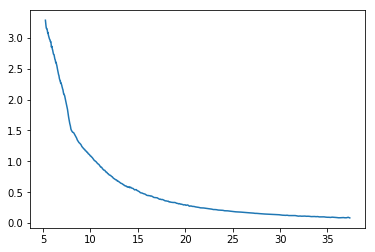

In [20]:
plt.plot(full_wave, full_flux);

***

## Wavelength arrays

In [21]:
pickle_dir = 'cassis_dataframes/'
pickle_files = np.sort(glob.glob(pickle_dir + '*.pkl'))

In [22]:
len(pickle_files)

11081

In [28]:
for index, filename in enumerate(pickle_files):
    if index >= 1:
        break
    
    wave, module, order = get_wavelength_grid(filename)
    print(wave, module, order)
    
    if index == 0:
        static_wave = wave
        continue
        
    if index % 5 == 0:
        print(index, '/', len(pickle_files))
        
    if not np.all(static_wave == wave):
        raise ValueError('Wavelength arrays not equal...!')

0       7.576120
1       7.636600
2       7.697090
3       7.757570
4       7.818050
5       7.878540
6       7.939020
7       7.999510
8       8.059990
9       8.120470
10      8.180960
11      8.241440
12      8.301920
13      8.362410
14      8.422890
15      8.483370
16      8.543860
17      8.604340
18      8.664830
19      8.725310
20      8.785790
21      8.846280
22      8.906760
23      8.967240
24      9.027730
25      9.088210
26      9.148690
27      9.209180
28      9.269660
29      9.330150
         ...    
357    18.895941
358    18.980610
359    19.065290
360    19.149969
361    19.234640
362    19.319321
363    19.403999
364    19.488670
365    19.573351
366    19.658030
367    19.742701
368    19.827379
369    19.912060
370    19.996731
371    20.081409
372    20.166090
373    20.250771
374    20.335440
375    20.420120
376    20.504801
377    19.912060
378    20.081409
379    20.250771
380    20.420120
381    20.589470
382    20.758829
383    20.928181
384    21.0975

In [31]:
np.unique(module)

array([0., 1., 2., 3.], dtype=float32)

In [32]:
np.unique(order)

array([1., 2., 3.], dtype=float32)

In [38]:
def reorder_wavegrid(wave, module, order):
    mods = np.unique(module)
    ords = np.unique(order)
    
    # module = 
    print('module:')
    print(np.where(module == 0))
    print(np.where(module == 1))
    print(np.where(module == 2))
    print(np.where(module == 3))
    
    print('order:')
    print(np.where(order == 1))
    print(np.where(order == 2))
    print(np.where(order == 3))
    


In [39]:
reorder_wavegrid(wave, module, order)

module:
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106]),)
(array([107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 17

In [11]:
wave = get_wavelength_grid(file1)

NameError: name 'file1' is not defined

In [12]:
type(wave)

pandas.core.series.Series

In [27]:
np.array(wave)

array([ 7.57612,  7.6366 ,  7.69709,  7.75757,  7.81805,  7.87854,
        7.93902,  7.99951,  8.05999,  8.12047,  8.18096,  8.24144,
        8.30192,  8.36241,  8.42289,  8.48337,  8.54386,  8.60434,
        8.66483,  8.72531,  8.78579,  8.84628,  8.90676,  8.96724,
        9.02773,  9.08821,  9.14869,  9.20918,  9.26966,  9.33015,
        9.39063,  9.45111,  9.5116 ,  9.57208,  9.63256,  9.69305,
        9.75353,  9.81401,  9.8745 ,  9.93498,  9.99547, 10.05595,
       10.11643, 10.17692, 10.2374 , 10.29788, 10.35837, 10.41885,
       10.47933, 10.53982, 10.6003 , 10.66079, 10.72127, 10.78175,
       10.84224, 10.90272, 10.9632 , 11.02369, 11.08417, 11.14465,
       11.20514, 11.26562, 11.32611, 11.38659, 11.44707, 11.50756,
       11.56804, 11.62852, 11.68901, 11.74949, 11.80997, 11.87046,
       11.93094, 11.99143, 12.05191, 12.11239, 12.17288, 12.23336,
       12.29384, 12.35433, 12.41481, 12.47529, 12.53578, 12.59626,
       12.65675, 12.71723, 12.77771, 12.8382 , 12.89868, 12.95